# 04. Self Oil Station Price Analysis

## 1. 셀레니움 설치
- windows, mac(intel)
    - conda install selenium
- mac(m1)
    - pip install selenium    

### Selenium 사용하여 웹크롤링을 하는 이유
- BeautifulSoup 만으로 해결할 수 없는 것
    - 접근할 웹 주소를 알 수 없을때
    - 자바스크립트를 사용하는 웹페이지의 경우
    - 웹브라우저로 접근하지 않으면 안될 때(예) 항공편 예매할때 웹브라우저에서 승객 수, 날짜, 좌석등급 등을 설정해줘야 데이터가 나옴)
    - 동적 페이지(예) 페이스북같이 스크롤하면 계속 하위페이지가 나오는 경우)

# Selenium:
- 웹 브라우저를 원격 조작하는 도구
- 자동으로 URL을 열고 클릭 등이 가능
- 스크롤, 문자의 입력, 화면 캡처 등등

In [116]:
!pip show selenium #pip list 는 전체 설치된 모듈 리스트 조회
# pip list | grep sele 선생님이 말씀하신 이건 Note: you may need to restart the kernel to use updated packages.
# 라고 뜨면서 조회가 안됌

Name: selenium
Version: 4.8.0
Summary: 
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\taen\miniconda3\envs\ds_study\lib\site-packages
Requires: certifi, trio, trio-websocket, urllib3
Required-by: 


In [117]:
pip show webdriver_manager

Name: webdriver-manager
Version: 3.8.5
Summary: Library provides the way to automatically manage drivers for different browsers
Home-page: https://github.com/SergeyPirogov/webdriver_manager
Author: Sergey Pirogov
Author-email: automationremarks@gmail.com
License: 
Location: c:\users\taen\miniconda3\envs\ds_study\lib\site-packages
Requires: packaging, python-dotenv, requests, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [136]:
# 구 버전 - 크롬 버전에 따라 웹드라이버를 변경하여 설치. 업데이트 필요
# from selenium import webdriver
# driver = webdriver.Chrome(executable_path='../driver/chromedriver.exe') 
# #window의 경우 .exe를 붙임. executable_path= 드라이버가 저장된 경로를 넣는 것임
# driver.get('웹사이트 주소')
# driver.quit() 이걸 하지않으면 드라이버가 여러개 열려있을 수 있음

# 신 버전 - 크롬버전, 웹드라이버 필요 x
# - pip install --upgrade selenium(selenium 버전이 4이상이어야함)
# - pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.by import By 클릭

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://pinkwink.kr/')
# driver.quit() 이걸 하지않으면 드라이버가 여러개 열려있을 수 있음. 가장 안전하게 끄는 방법

# Selenium Basic
- 구글에 selenium documentation 첫번째 클릭하면 내용 볼 수 있음
- 강의도 그것에 따라 진행되고 있음 참고.
- https://www.selenium.dev/documentation/webdriver/getting_started/install_drivers/
- https://selenium-python.readthedocs.io/

## 1. Selenium webdriver 사용해보기

In [137]:
#driver.quit()

In [138]:
# 화면 최대 크기 설정
driver.maximize_window()
# 현재 보이는 화면에 태그가 존재해야지만 에러가 발생하지 않음
# 따라서 최대한 한 화면에 많은 정보가 담기는 것이 데이터를 가져올 때 유리

In [139]:
# 화면 최소 크기 설정
driver.minimize_window()

In [140]:
# 화면 크기 설정
driver.set_window_size(600, 600)

In [141]:
# 새로고침
driver.refresh()

In [142]:
# 뒤로가기
driver.back()

In [143]:
# 앞으로가기
driver.forward()

In [144]:
# 클릭
from selenium.webdriver.common.by import By 

first_content = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-masonry > div > ul > li:nth-child(1)') 
#가져오려는 것이 단수면 find_element 복수면 find_elements이용
# By는 클래스 이름
# By.CSS_SELECTOR 는 개발자도구에서 첫번째 li style 부분에서 마우스 오른쪽 copy selector

# #content > div.cover-masonry > div > ul > li:nth-child(1)
# html태그에서 #은 id를 의미. content라는 태그 밑에 div라는 태그를 가지고 있는데
# 그 클래스 이름이 cover-masonry 이고 그 바로 밑에 div라는 태그가 있고 바로 밑에
# ul 이라는 태그가 있고 그 바로 밑에 li:nth-child(1)라는 태그 (1)은 첫번째.
# 나중에는 앞에 코드를 하나씩 생략해보면서 생략해도 간단하게 나타낼 수 있네?를 경험해보기
# 지금은 간단하게 복사하였음

first_content.click()

In [145]:
# 새로운 탭 생성 - 자바스크립트 언어를 실행하겠다는 명령어
# selenium을 사용하는 이유가 자바스크립트를 이용한 웹사이트도 뚫기 위해서
driver.execute_script('window.open("https://naver.com")') 
driver.execute_script('window.open("https://blog.naver.com/collier13/222990642206")') 
#''안에는 자바스크립트 코드임. 구글링해서 조금씩 공부하면 읽는데 문제없을것임

In [146]:
# 탭 이동
driver.switch_to.window(driver.window_handles[1]) #인덱스 번호[]넣으면 탭이동

In [147]:
# 내가 다룰 수 있는 윈도우 개수
len(driver.window_handles)

3

In [148]:
# 현재 탭 닫기
driver.close()
# 닫고 싶은 탭이 있으면 위에 탭 이동 코드를 통해 이동한 다음 닫아줘야함

In [149]:
# 이건 전체 종료
driver.quit()

## 2. 화면 스크롤

In [157]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.by import By 클릭

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://pinkwink.kr/')

In [158]:
# 스크롤 가능한 높이(길이)
driver.execute_script('return document.body.scrollHeight')
# document는 html document를 의미. 
# return document.body.scrollHeight: 내가 지금 바라보고 있는  document에서
# body 부분에서 scrollHeight 라는 값을 반환해줘라는 코드

# 창을 좁게하거나 넓히면 값이 거기에 맞게 바뀜

5700

In [159]:
# 화면 스크롤 하단 이동
driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
# 스크롤를 0에서 제일 끝까지 이동을 시켜줘라는 뜻

In [160]:
# 현재 보이는 화면 스크린샷 저장
driver.save_screenshot('./last_height.png')

True

In [161]:
# 화면 스크롤 상단 이동
driver.execute_script('window.scrollTo(0, 0)')

In [162]:
# 특정 태그 지점까지 스크롤 이동
from selenium.webdriver import ActionChains

some_tag = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-list > div > ul > li:nth-child(1)')
action =  ActionChains(driver)
action.move_to_element(some_tag).perform()

In [163]:
driver.quit()

## 3. 검색어 입력

- CSS_SELECTOR

In [164]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.naver.com')

In [165]:
# 네이버 검색
keyword = driver.find_element(By.CSS_SELECTOR, '#query') #검색어치는부분
keyword.clear() # 원래있던 검색어 지우기
keyword.send_keys('파이썬')

In [166]:
search_btn = driver.find_element(By.CSS_SELECTOR,'#search_btn') 
#검색어치고 난 후 검색하려면 클릭하는 부분
search_btn.click()

- XPATH (그러나 BeautifulSoup에서는 XPATH 를 사용할 수 없음)

In [169]:
driver.find_element(By.XPATH, '//*[@id="query"]').send_keys('xpath란?')
# //: 경로 중 최상위 루트를 의미
# *: 자손 태그(바로 밑은 아니지만 하위에 있는 태그)
# /: 자식 태그(바로 밑에 있는 태그)

# 예) //*[@id="main_pack"]/section[2]/div/div[2]/panel-list/div/ul/li[1]/div/div/a
# div[2]: div 중에서 2번째 태그
# 태그 안에 ""가 있으므로 바깥에는 ''를 사용하기


In [170]:
driver.find_element(By.XPATH, '//*[@id="search_btn"]').click()

In [171]:
driver.quit()

In [178]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://pinkwink.kr')

In [179]:
# 1. 돋보기 버튼을 선택 
# -> 그런데 돋보기 선택을 driver.find_element(By.CSS_SELECTOR, '#header > div.search')로 하니까 오류남
# 이유는? 돋보기를 눌렀을때 태그가 #header > div.search 에서 #header > div.search.on 로 바뀜
# 이는 동적페이지 기능 중 하나임. 일반적인 방법으론 동작하지 않음. 따라서

from selenium.webdriver import ActionChains

search_tag = driver.find_element(By.CSS_SELECTOR, '.search') # #header > div.search 이거지만 간소화
action = ActionChains(driver)
action.click(search_tag).perform()

In [180]:
# 2. 검색어 입력 -> 위에 생략하고 바로 이것부터 해도 실행됌
driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > input[type=text]').send_keys('딥러닝')

In [181]:
# 3. 검색 버튼을 클릭
driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > button').click()

## 4. Selenium + BeautifulSoup
- BeautifulSoup의 경우 이용하려면 html 코드가 필요함

In [182]:
# 현재 화면의 html 코드
driver.page_source

'<html lang="ko"><head>\n                \n                \n                        <!-- BusinessLicenseInfo - START -->\n        \n            <link href="https://tistory1.daumcdn.net/tistory_admin/userblog/userblog-ce2b1cf88ca4f3e019bc6a3b9c241e836905a98e/static/plugin/BusinessLicenseInfo/style.css" rel="stylesheet" type="text/css">\n\n            <script src="https://t1.kakaocdn.net/malibu_prod/wpm.js" async=""></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=pinkwink.kr&amp;callback=_gfp_s_&amp;client=ca-pub-2982459700139266&amp;cookie=ID%3D1f7288166a50c57d-22f0fb6e6fd9003e%3AT%3D1674846470%3ART%3D1674846470%3AS%3DALNI_MZVTsBrrkjtUTWsUloWx3ztjkfWGw&amp;gpic=UID%3D000009940dc4ef18%3AT%3D1674846470%3ART%3D1674846470%3AS%3DALNI_MY6EQP6ebVzlayBzhaSbxPyFmhgHw"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202301120101/show_ads_impl_fy2021.js

In [183]:
from bs4 import BeautifulSoup

req = driver.page_source
soup =  BeautifulSoup(req, 'html.parser')

In [185]:
contents = soup.select('.post-item')
contents

[<div class="post-item">
 <a href="/1406">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/bcnXir/btrWhsGvSRZ/NWyRKg6jI8qeoPFo6gD2o0/img.png"/>
 </span>
 <span class="title">[수강생 프로젝트 소개] 스마트 주차장</span>
 <span class="date">2023. 1. 20. 08:00</span>
 <span class="excerpt">저는 머신러닝 딥러닝 분야에서 자주 소개하는 제로베이스의 전임강사를 수행하고 있습니다. 그리고 또 AI 로봇 분야에서 강의활동을 하고 있는 곳이 있는데요. 이 과정을 한 번 제 블로그에서도 소개한 적이 있습니다. https://pinkwink.kr/1396 AI와 로봇을 함께 배울 수 있는 꽤 괜찮은 수업을 핑크랩이 시작합니다. 저는 예전부터 제로베이스에서 데이터 사이언스 관련 과정을 수업하고 있습니다. 그리고 예전에 AI 로봇이라는 주제로 다수의 수업들을 했었습니다. 이번에는 무려 6개월의 기간을 자랑하는 긴~ pinkwink.kr 위 과정은 제가 강의에 관여하기 시작한 것은 이번이 처음입니다. 그 전에는 다른 강사님이 진행하셨다고 알고 있구요. 저는 여러 활동을 하기 때문에 혼자 이 강의를 진행하지는..</span>
 </a>
 </div>,
 <div class="post-item">
 <a href="/1407">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/wpuRJ/btrWismzvEK/d5xmwkQwdKvMew1fGM7KXk/img.png"/>
 </span>
 <span class="title">[수강생 프로젝트 소개] 

In [186]:
len(contents)

8

In [187]:
contents[2]

<div class="post-item">
<a href="/1403">
<span class="thum">
<img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/cfy4Yc/btrU01Kt0ae/eYoNZD3FVYg6xjTrVldNIK/img.png"/>
</span>
<span class="title">2022년 PinkWink 결산</span>
<span class="date">2023. 1. 1. 06:00</span>
<span class="excerpt">2022년도 마지막 날입니다. 지금 저는 가족 여행으로 괌에 와 있는데요. 문득 올 한 해를 마무리하는 글을 작성하고 싶어지네요. 예전에는 블로그 결산글을 올렸던 것 같은데... 한 동안 안했었는데요. 다시 다양한 각도에서 올 한 해를 마무리 해야겠습니다. PinkLAB 설립 먼저 22년 5월 23일 주식회사 핑크랩을 설립했습니다. 사실 정~말 솔직하게 언제 문닫을지 알 수 없지만, 다양한 각도에서 일을 하려고 하니 법인이 필요하더라구요. 그래서 핑크랩 이름으로 된 여러 활동을 했습니다. 그 중에서 가장 큰 활동은 기업과 인턴을 연결하는 프로젝트였습니다. 특히 자율주행을 키워드로 해서 무려 4개 회사에 인턴을 총 13명을 딥러닝과 로봇 분야에 채용시키고 그 중 3개 회사에는 제가 직접 PL 역할을 수행했..</span>
</a>
</div>

In [ ]:
driver.quit()

## 2. 셀프 주유소가 정말 저렴하나요? - 데이터를 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.opinet.co.kr/searRgSelect.do')

In [2]:
driver.get('https://www.opinet.co.kr/searRgSelect.do')
# url 접근하면 메인페이지가 뜸. 이렇게 한번 더 요청해야 우리가 원하는 페이지로 접속이 됌
# 선생님은 팝업창이 나온다는데 나는 팝업창 안 나옴

- 문제
    - 1. 해당 URL로 한 번에 접근이 안된다
    - 2. 메인페이지로 접속이 되고 팝업창이 하나 나온다.

In [3]:
'''
import time

def main_get():
    # 페이지 접근
    driver.get('https://www.opinet.co.kr/searRgSelect.do')  
    time.sleep(3)
    # 팝업창 화면으로 전환하기
    driver.switch_to_window(driver.window_handles[-1])
    # 팝업창 닫기
    driver.close()
    # 메인화면 창으로 전환하기(시간이 조금 걸리는데 바로 전환하면 에러남. 약간의 시간이 필요함)
    time.sleep(3)
    driver.switch_to_window(driver.window_handles[-1])
    # 접근 url 다시 요청
    driver.get('https://www.opinet.co.kr/searRgSelect.do')   
'''


"\nimport time\n\ndef main_get():\n    # 페이지 접근\n    driver.get('https://www.opinet.co.kr/searRgSelect.do')  \n    time.sleep(3)\n    # 팝업창 화면으로 전환하기\n    driver.switch_to_window(driver.window_handles[-1])\n    # 팝업창 닫기\n    driver.close()\n    # 메인화면 창으로 전환하기(시간이 조금 걸리는데 바로 전환하면 에러남. 약간의 시간이 필요함)\n    time.sleep(3)\n    driver.switch_to_window(driver.window_handles[-1])\n    # 접근 url 다시 요청\n    driver.get('https://www.opinet.co.kr/searRgSelect.do')   \n"

In [4]:
# 함수 실행
# main_get()

In [38]:
# 지역: 시/도
# driver.find_element(By.ID, "SIDO_NM0") 
# #id로 직접 가져와도됨

sido_list_raw= driver.find_element(By.CSS_SELECTOR, '#SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n              대전\n             \n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [17]:
# <option value="서울특별시">서울</option>
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option') #여러개이므로 elements
len(sido_list), sido_list[1].text

(18, '서울')

In [26]:
sido_list[1].text

'서울'

In [27]:
''' 굳이 value 값 안빼내고 이렇게 해도됨
sido_names = []

for option in sido_list: #option = sido_list[n]
    sido_names.append(option.text)
sido_names
'''

['시/도',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [29]:
'''
sido_names = sido_names[1:]
sido_names
'''

['서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [32]:
'''
sido_list_raw.send_keys(sido_names[3])
'''

In [33]:
# <option value="서울특별시">서울</option> 에서 태그값이 아닌 속성값 데이터 가져오기
sido_list[1].get_attribute('value')

'서울특별시'

In [8]:
# 1
sido_names = []

for option in sido_list: #option = sido_list[n]
    sido_names.append(option.get_attribute('value'))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [34]:
# 2
sido_names = [option.get_attribute('value') for option in sido_list] 
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [35]:
# 맨 앞이 빈칸이므로
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [36]:
sido_list_raw.send_keys(sido_names[0])

In [57]:
# 구

gu_list_raw = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list_raw.text

'            시/군/구\n            \n             \n             \n              강남구\n             \n            \n             \n              강동구\n             \n             \n            \n             \n             \n              강북구\n             \n            \n             \n             \n              강서구\n             \n            \n             \n             \n              관악구\n             \n            \n             \n             \n              광진구\n             \n            \n             \n             \n              구로구\n             \n            \n             \n             \n              금천구\n             \n            \n             \n             \n              노원구\n             \n            \n             \n             \n              도봉구\n             \n            \n             \n             \n              동대문구\n             \n            \n             \n             \n              동작구\n             \n            \n             \n             \

In [58]:
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option')
gu_list[1].text

'강남구'

In [59]:
gu_names= [option.text for option in gu_list]
gu_names

['시/군/구',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [60]:
gu_names = gu_names[1:]
len(gu_names), gu_names

(25,
 ['강남구',
  '강동구',
  '강북구',
  '강서구',
  '관악구',
  '광진구',
  '구로구',
  '금천구',
  '노원구',
  '도봉구',
  '동대문구',
  '동작구',
  '마포구',
  '서대문구',
  '서초구',
  '성동구',
  '성북구',
  '송파구',
  '양천구',
  '영등포구',
  '용산구',
  '은평구',
  '종로구',
  '중구',
  '중랑구'])

In [61]:
gu_list_raw.send_keys(gu_names[1])

In [62]:
# 엑셀 저장

element_get_excel = driver.find_element(By.ID, 'glopopd_excel').click()

In [64]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)


    


C:\Users\TAEN\AppData\Local\Temp\ipykernel_13748\2927129782.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
# driver.close()

## 4. 데이터 정리하기

In [66]:
import pandas as pd
from glob import glob

In [67]:
# 파일 목록 한번에 가져오기
glob("../data/서울_위치별(주유소)/서울_*.xls")

['../data/서울_위치별(주유소)\\서울_위치별(주유소) (1).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (10).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (11).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (12).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (13).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (14).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (15).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (16).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (17).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (18).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (19).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (2).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (20).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (21).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (22).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (23).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (24).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (25).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (3).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (4).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (5).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (6).

In [68]:
# 파일명 저장
stations_files = glob("../data/서울_위치별(주유소)/서울_*.xls")
stations_files[:5]

['../data/서울_위치별(주유소)\\서울_위치별(주유소) (1).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (10).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (11).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (12).xls',
 '../data/서울_위치별(주유소)\\서울_위치별(주유소) (13).xls']

In [72]:
tmp = pd.read_excel(stations_files[0], header=2) # header=2 두번째 컬럼부터 읽기
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
12,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,-,1823,1924,-
13,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1978,2028,1900


In [73]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
tmp_raw


[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시        (주)소모에너지 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 2   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 3   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 4   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 5   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 6   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 7   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 8   서울특별시        (주)소모에너지 성내주유소         서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 9   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 10  서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 11  서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 12  서울특별시               천호현대주유소      

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [74]:
station_raw = pd.concat(tmp_raw)
station_raw
# rows를 보면 끝이 470번대여야하는데 15로 끝난거보면 수정이 필요함

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1569,1669,-
1,서울특별시,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1836,1586,1698,1650
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1594,1723,-
3,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1845,1596,1728,1600
4,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1913,1624,1748,-
...,...,...,...,...,...,...,...,...,...,...
11,서울특별시,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),S-OIL,02-996-6640,Y,-,1575,1595,-
12,서울특별시,노원교주유소,서울 도봉구 마들로 776 (도봉동),현대오일뱅크,02-956-5189,Y,-,1583,1695,1485
13,서울특별시,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),현대오일뱅크,02-998-9704,Y,-,1598,1668,1500
14,서울특별시,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),GS칼텍스,02-905-4441,Y,-,1599,1619,-


In [76]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      443 non-null    object
 1   상호      443 non-null    object
 2   주소      443 non-null    object
 3   상표      443 non-null    object
 4   전화번호    443 non-null    object
 5   셀프여부    443 non-null    object
 6   고급휘발유   443 non-null    object
 7   휘발유     443 non-null    int64 
 8   경유      443 non-null    object
 9   실내등유    443 non-null    object
dtypes: int64(1), object(9)
memory usage: 38.1+ KB


In [116]:
stations = pd.DataFrame({
    "상호": station_raw["상호"],
    "주소": station_raw["주소"],
    "휘발유 가격": station_raw["휘발유"],
    "셀프": station_raw["셀프여부"],
    "상표": station_raw["상표"],
    })
stations.tail()

,상호,주소,휘발유 가격,셀프,상표
11,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),1575,Y,S-OIL
12,노원교주유소,서울 도봉구 마들로 776 (도봉동),1583,Y,현대오일뱅크
13,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1598,Y,현대오일뱅크
14,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1599,Y,GS칼텍스
15,오복주유소,서울 도봉구 방학로 43,1615,Y,S-OIL


In [117]:
stations['주소']

0     서울특별시 강동구  천호대로 1246 (둔촌제2동)
1           서울 강동구 양재대로 1323 (성내동)
2            서울 강동구 구천면로 357 (암사동)
3                 서울 강동구 천호대로 1168
4             서울 강동구 고덕로 168 (명일동)
                  ...             
11             서울 도봉구 마들로 574 (창동)
12            서울 도봉구 마들로 776 (도봉동)
13            서울 도봉구 노해로 161 (쌍문동)
14             서울 도봉구 덕릉로 267 (창동)
15                   서울 도봉구 방학로 43
Name: 주소, Length: 443, dtype: object

In [118]:
for eachAddress in stations['주소']:
    print(eachAddress.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
용산구
용산구
용산구
용산구
용산구
용산구
용

In [119]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations

,상호,주소,휘발유 가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구
1,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1586,Y,GS칼텍스,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1594,N,현대오일뱅크,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1596,N,GS칼텍스,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1624,Y,현대오일뱅크,강동구
...,...,...,...,...,...,...
11,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),1575,Y,S-OIL,도봉구
12,노원교주유소,서울 도봉구 마들로 776 (도봉동),1583,Y,현대오일뱅크,도봉구
13,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1598,Y,현대오일뱅크,도봉구
14,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1599,Y,GS칼텍스,도봉구


In [120]:
stations['구'].unique(), len(stations['구'].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구',
        '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구'], dtype=object),
 25)

In [121]:
'''
# 교재처럼 구에 서울특별시와 특별시가 들어가 있어 len이 27이 나올 경우

stations[stations['구'] == '서울특별시'] #stations['구']가 서울특별시인 인덱스
stations.loc[station['구'] == '서울특별시', '구'] = '성동구'
stations.loc[station['구'] == '특별시', '구'] = '도봉구'
stations['구'].unique()

'''

"\n# 교재처럼 구에 서울특별시와 특별시가 들어가 있어 len이 27이 나올 경우\n\nstations[stations['구'] == '서울특별시'] #stations['구']가 서울특별시인 인덱스\nstations.loc[station['구'] == '서울특별시', '구'] = '성동구'\nstations.loc[station['구'] == '특별시', '구'] = '도봉구'\nstations['구'].unique()\n\n"

In [122]:
# 가격 데이터형 변환 object => float

stations['휘발유 가격'] = stations['휘발유 가격'].astype('float')

In [123]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      443 non-null    object 
 1   주소      443 non-null    object 
 2   휘발유 가격  443 non-null    float64
 3   셀프      443 non-null    object 
 4   상표      443 non-null    object 
 5   구       443 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.2+ KB


In [125]:
# 가격 정보 없는 주유소 제거 (추가하는 방법도 있음. 그런데 나 같은 경우 휘발유는 가격정보가 모두 있었음)
# stations = stations[stations['가격'] != '-']
# station.tail()
# stations['휘발유 가격'] = stations['휘발유 가격'].astype('float')
# stations.info()

In [126]:
stations

,상호,주소,휘발유 가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569.0,Y,현대오일뱅크,강동구
1,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1586.0,Y,GS칼텍스,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1594.0,N,현대오일뱅크,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1596.0,N,GS칼텍스,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1624.0,Y,현대오일뱅크,강동구
...,...,...,...,...,...,...
11,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),1575.0,Y,S-OIL,도봉구
12,노원교주유소,서울 도봉구 마들로 776 (도봉동),1583.0,Y,현대오일뱅크,도봉구
13,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1598.0,Y,현대오일뱅크,도봉구
14,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1599.0,Y,GS칼텍스,도봉구


In [127]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,휘발유 가격,셀프,상표,구
438,11,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),1575.0,Y,S-OIL,도봉구
439,12,노원교주유소,서울 도봉구 마들로 776 (도봉동),1583.0,Y,현대오일뱅크,도봉구
440,13,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1598.0,Y,현대오일뱅크,도봉구
441,14,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1599.0,Y,GS칼텍스,도봉구
442,15,오복주유소,서울 도봉구 방학로 43,1615.0,Y,S-OIL,도봉구


In [129]:
del stations['index']
stations.tail()

,상호,주소,휘발유 가격,셀프,상표,구
438,극동유화(주) 대안주유소,서울 도봉구 마들로 574 (창동),1575.0,Y,S-OIL,도봉구
439,노원교주유소,서울 도봉구 마들로 776 (도봉동),1583.0,Y,현대오일뱅크,도봉구
440,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1598.0,Y,현대오일뱅크,도봉구
441,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1599.0,Y,GS칼텍스,도봉구
442,오복주유소,서울 도봉구 방학로 43,1615.0,Y,S-OIL,도봉구


## 5. 주유 가격 정보 시각화

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc #한글설정
plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')
%matplotlib inline   

<AxesSubplot: title={'center': '휘발유 가격'}, xlabel='셀프'>

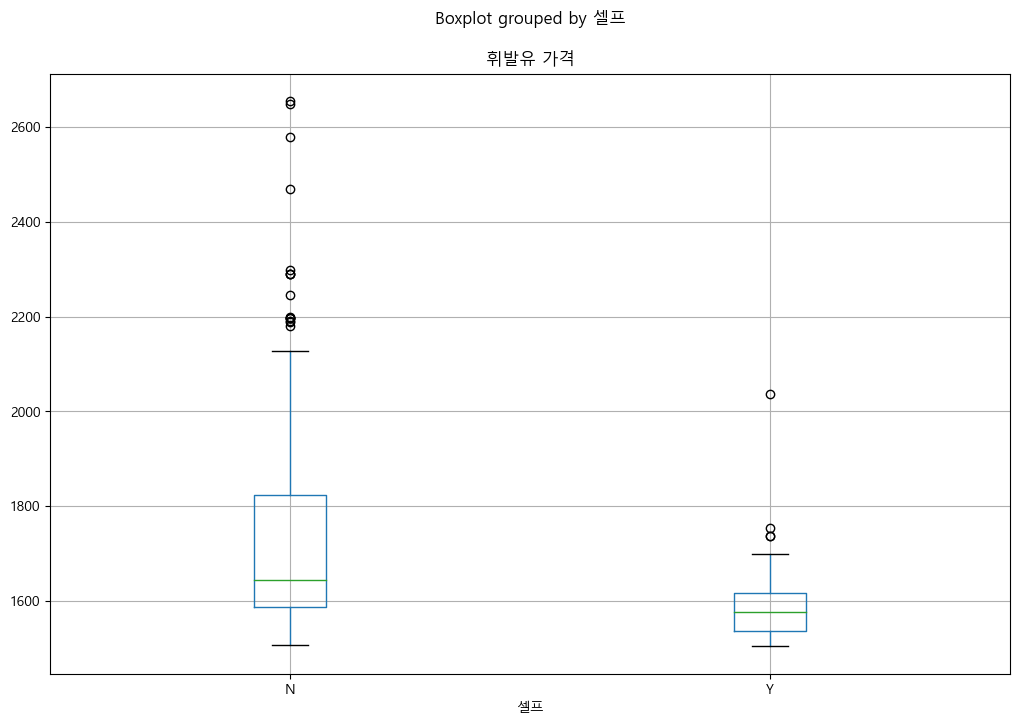

In [150]:
# boxplot(feat. pandas)

stations.boxplot(column='휘발유 가격', by='셀프', figsize=(12, 8))

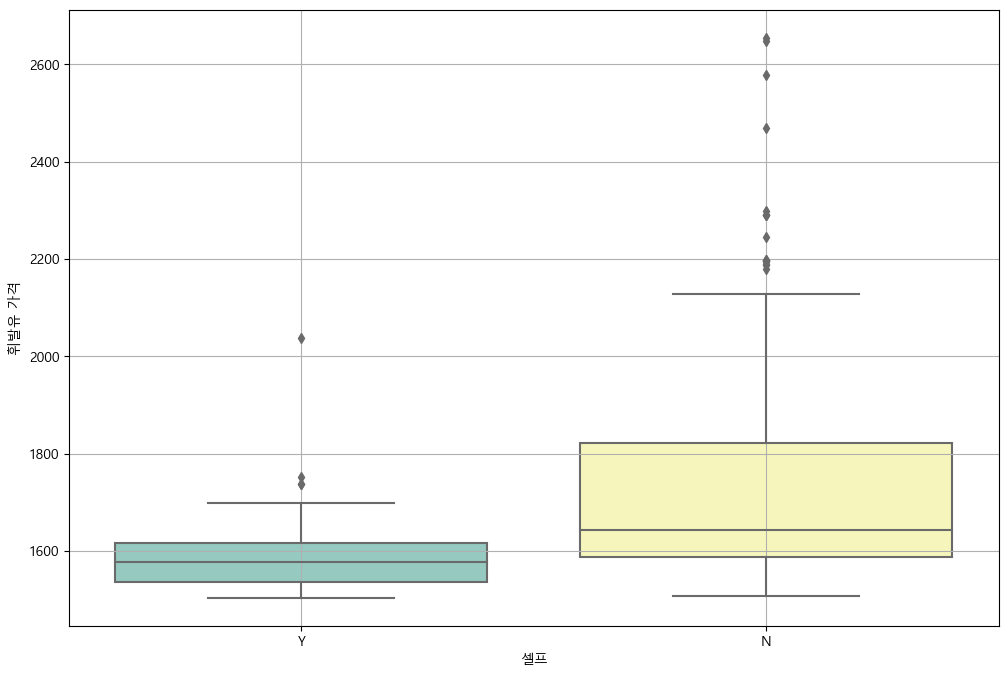

In [151]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x='셀프', y='휘발유 가격',data=stations, palette="Set3")
plt.grid(True)
plt.show()

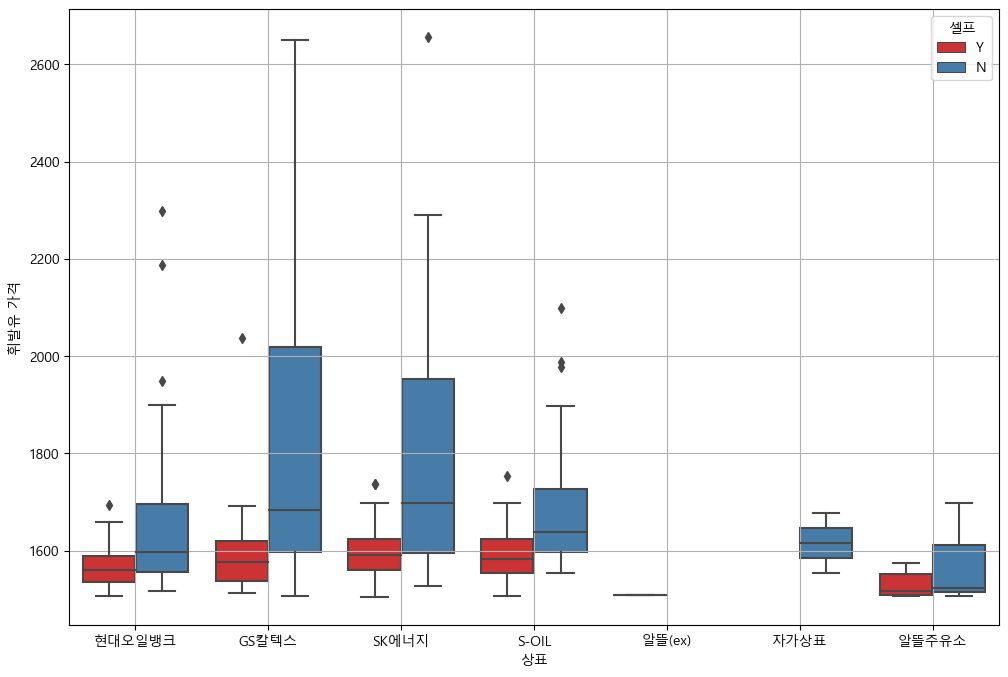

In [152]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='휘발유 가격', hue='셀프', data=stations, palette='Set1')
plt.grid(True)
plt.show()

In [153]:
# 지도 시각화
import json
import folium

# 코드는 돌아가는데 빨간색 warnings 문구가보기 싫다면? 나의 경우 안뜨므로 생략
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning) 

In [154]:
# 가장 비싼 주유소 10개
stations.sort_values(by='휘발유 가격', ascending=False).head(10)

,상호,주소,휘발유 가격,셀프,상표,구
274,서남주유소,서울 중구 통일로 30,2655.0,N,SK에너지,중구
240,서계주유소,서울 용산구 청파로 367 (청파동),2649.0,N,GS칼텍스,용산구
320,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
273,필동주유소,서울 중구 퇴계로 196 (필동2가),2469.0,N,GS칼텍스,중구
319,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298.0,N,현대오일뱅크,강남구
317,SK논현주유소,서울 강남구 논현로 747 (논현동),2290.0,N,SK에너지,강남구
318,갤러리아주유소,서울 강남구 압구정로 426,2290.0,N,SK에너지,강남구
239,한석주유소,서울 용산구 이촌로 164,2290.0,N,SK에너지,용산구
316,대청주유소,서울 강남구 개포로 654 (일원동),2246.0,N,SK에너지,강남구
216,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2199.0,N,GS칼텍스,영등포구


In [155]:
# 가장 싼 주유소 10개
stations.sort_values(by='휘발유 가격', ascending=False).tail(10)
# stations.sort_values(by='휘발유 가격', ascending=True).head(10)

,상호,주소,휘발유 가격,셀프,상표,구
168,양천구주유소,서울 양천구 국회대로 275 (목동),1510.0,Y,알뜰주유소,양천구
324,목화주유소,서울 강서구 국회대로 251 (화곡동),1510.0,Y,알뜰주유소,강서구
67,만남의광장주유소,서울 서초구 양재대로12길 73-71,1509.0,Y,알뜰(ex),서초구
321,화곡역주유소,서울 강서구 강서로 154 (화곡동),1508.0,Y,알뜰주유소,강서구
322,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1508.0,N,알뜰주유소,강서구
166,현대주유소,서울 양천구 남부순환로 372 (신월동),1508.0,Y,S-OIL,양천구
167,플라트(주)서호주유소,서울 양천구 남부순환로 317,1508.0,N,GS칼텍스,양천구
323,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1508.0,Y,현대오일뱅크,강서구
242,제이제이에너지,서울 은평구 응암로 163,1507.0,Y,SK에너지,은평구
241,타이거주유소,서울 은평구 수색로 188 (증산동),1504.0,Y,SK에너지,은평구


In [160]:
gu_data = pd.pivot_table(data=stations, index='구', values='휘발유 가격', aggfunc=np.mean)
gu_data.head(10)

,휘발유 가격
구,
강남구,1875.969697
강동구,1668.928571
강북구,1542.750000
강서구,1587.484848
관악구,1636.928571
광진구,1594.000000
구로구,1634.100000
금천구,1608.181818
노원구,1613.266667


In [161]:
gu_data.tail(10)

,휘발유 가격
구,
성동구,1711.312500
성북구,1569.000000
송파구,1607.933333
양천구,1558.708333
영등포구,1638.333333
용산구,2003.500000
은평구,1547.187500
종로구,1881.250000
중구,1992.600000


In [178]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '휘발유 가격'],
    key_on='feature.id',
    fill_color="PuRd"
)
my_map